In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [6]:
import zipfile
zf= zipfile.ZipFile('events.csv.zip')
events= pd.read_csv(zf.open('events.csv'))
print events.shape
events.head()

(3252950, 5)


,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


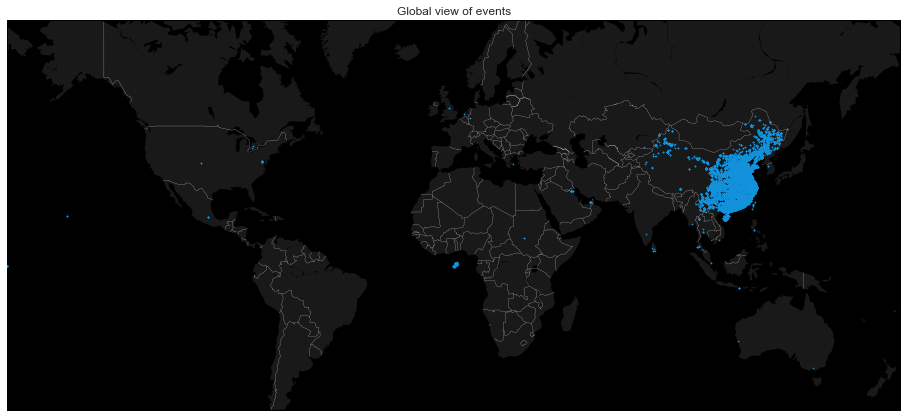

In [10]:
# Set up plot
events_sample = events.sample(n=100000)
plt.figure(1, figsize=(16,8))

# Mercator of World
m1 = Basemap(projection='merc',
             llcrnrlat=-50,
             urcrnrlat=70,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')

m1.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000')                # black background
m1.drawcountries(linewidth=0.2, color="w")              # thin white line for country borders

# Plot the data
mxy = m1(events_sample["longitude"].tolist(), events_sample["latitude"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="#1292db", lw=0, alpha=1, zorder=5)

plt.title("Global view of events")
plt.show()

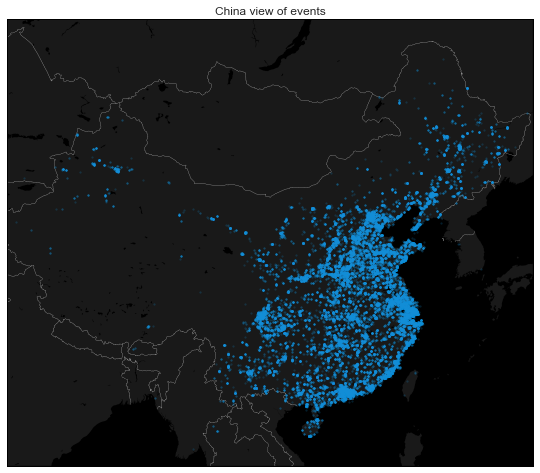

In [13]:
# Sample it down to only the China region
lon_min, lon_max = 75, 135
lat_min, lat_max = 15, 55

idx_china = (events["longitude"]>lon_min) &\
            (events["longitude"]<lon_max) &\
            (events["latitude"]>lat_min) &\
            (events["latitude"]<lat_max)

events_china = events[idx_china].sample(n=100000)

# Mercator of China
plt.figure(2, figsize=(16,8))

m2 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='i')

m2.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m2.drawmapboundary(fill_color='#000000')                # black background
m2.drawcountries(linewidth=0.2, color="w")              # thin white line for country borders

# Plot the data
mxy = m2(events_china["longitude"].tolist(), events_china["latitude"].tolist())
m2.scatter(mxy[0], mxy[1], s=5, c="#1292db", lw=0, alpha=0.2, zorder=5)

plt.title("China view of events")
plt.show()

In [14]:
zf= zipfile.ZipFile('gender_age_train.csv.zip')
train= pd.read_csv(zf.open('gender_age_train.csv'))
print train.shape
train.head()

(74645, 4)


,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [15]:
events_china.head()

,event_id,device_id,timestamp,longitude,latitude
2949094,2949095,-5515886077050167487,2016-05-05 16:46:43,116.50,39.98
1761922,1761923,-5108338403267133151,2016-05-02 01:21:43,115.90,28.71
1344707,1344708,-140598607725648259,2016-05-07 17:16:30,118.83,25.30
197858,197859,-8963224011259388607,2016-05-05 09:23:49,122.11,37.50
2617140,2617141,8169269573256157090,2016-05-01 15:38:14,100.08,23.88


In [18]:
events_gender= events.merge(train, how= 'inner', on= 'device_id')
print events.shape
print events_gender.shape

(3252950, 5)
(1215595, 8)


In [21]:
idx_china = (events_gender["longitude"]>lon_min) &\
            (events_gender["longitude"]<lon_max) &\
            (events_gender["latitude"]>lat_min) &\
            (events_gender["latitude"]<lat_max)
            
events_china_gender= events_gender[idx_china].sample(n= 100000)
#print events_china_gender.shape

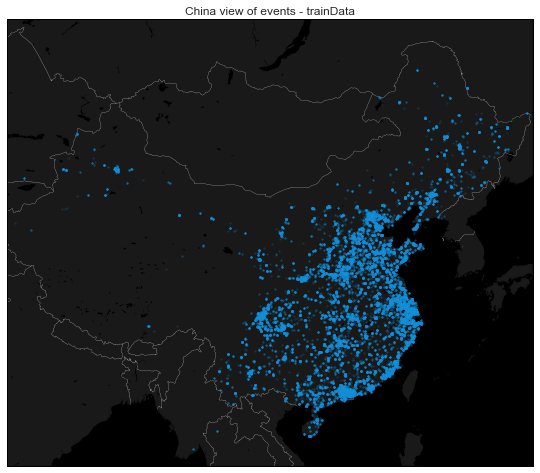

In [22]:
# Mercator of China
plt.figure(3, figsize=(16,8))

m3 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='i')

m3.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m3.drawmapboundary(fill_color='#000000')                # black background
m3.drawcountries(linewidth=0.2, color="w")              # thin white line for country borders

# Plot the data
mxy = m3(events_china_gender["longitude"].tolist(), events_china_gender["latitude"].tolist())
m3.scatter(mxy[0], mxy[1], s=5, c="#1292db", lw=0, alpha=0.2, zorder=5)

plt.title("China view of events - trainData")
plt.show()